In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
labels = [1000, 2000, 4000, 10000]
nprocs = [1, 2, 4, 8, 16, 32, 64]

In [6]:
with open('output.txt') as output:
  time = np.empty((len(labels), len(nprocs)))
  for i in range(len(labels)):
    print(output.readline())
    for j in range(len(nprocs)):    
      time[i][j] = float(output.readline().strip())

time

N: 1000; M: 1000; nproc: 1 2 4 8 16 32 64 80

N: 2000; M: 2000; nproc: 1 2 4 8 16 32 64 80

N: 4000; M: 4000; nproc: 1 2 4 8 16 32 64 80

N: 10000; M: 10000; nproc: 1 2 4 8 16 32 64 80



array([[  4.43,   3.38,   2.66,   2.12,   1.97,   2.35,   3.07],
       [ 13.66,   9.08,   5.63,   3.68,   2.66,   2.91,   3.42],
       [ 49.55,  30.96,  18.14,   8.86,   5.57,   5.16,   4.44],
       [303.24, 184.37,  95.95,  47.77,  25.42,  18.27,  14.24]])

In [7]:
def plot(x, data, labels):
  for (y, label) in zip(data, labels):
    plt.plot(x, y, 'o-', label=label)

  plt.xscale('log', base=2)
  plt.xlabel('Number of CPUs')
  
  plt.grid()
  plt.legend()


### Time

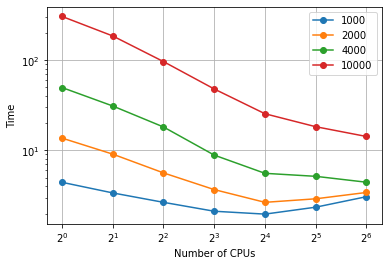

In [8]:
plot(nprocs, time, labels)

plt.yscale('log')
plt.ylabel('Time')

plt.savefig("images/time.pdf", bbox_inches = 'tight', pad_inches = 0)

### Speedup

In [9]:
time_serial = time[:, 0].reshape(time.shape[0], 1)
speedup = time_serial / time

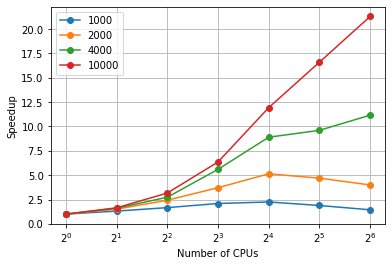

In [10]:
plot(nprocs, speedup, labels)

plt.ylabel('Speedup')

plt.savefig("images/speedup.pdf", bbox_inches = 'tight', pad_inches = 0)

### Efficiency

In [11]:
efficiency = speedup / nprocs

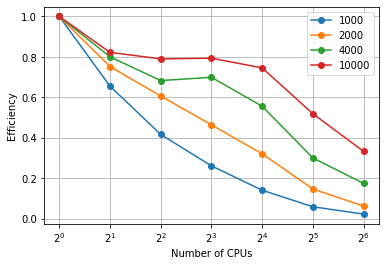

In [12]:
plot(nprocs, efficiency, labels)

plt.ylabel('Efficiency')

plt.savefig("images/efficiency.pdf", bbox_inches = 'tight', pad_inches = 0)

### Overhead

In [13]:
overhead = nprocs * time - time_serial

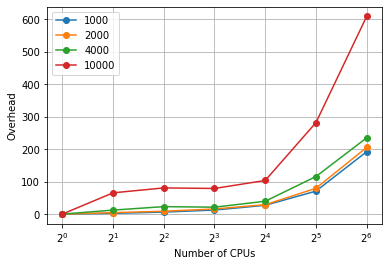

In [14]:
plot(nprocs, overhead, labels)

plt.ylabel('Overhead')

plt.savefig("images/overhead.pdf", bbox_inches = 'tight', pad_inches = 0)